# Titanic - P(deceased) - Samuel Zeke

## Import libraries

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read Data

In [129]:
train = pd.read_csv('DA_titanic_train.csv')

Checking data

In [130]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
4,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Explore Data

<AxesSubplot:>

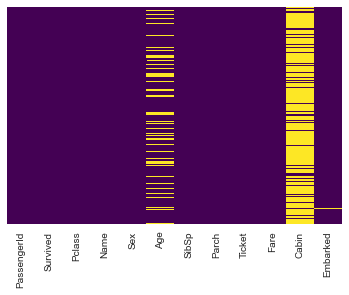

In [131]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

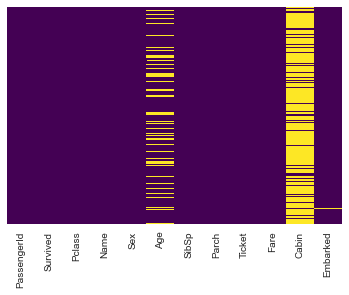

In [132]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

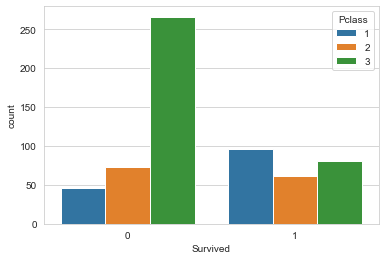

In [133]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

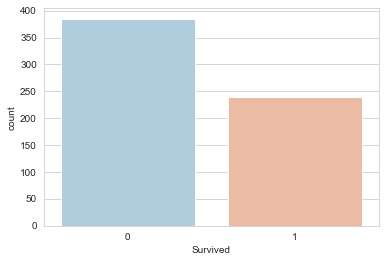

In [134]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

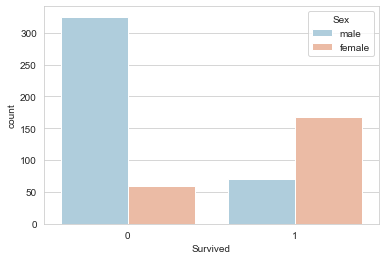

In [135]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

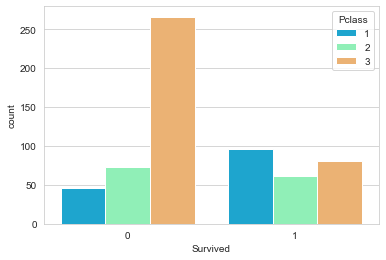

In [136]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

<AxesSubplot:>

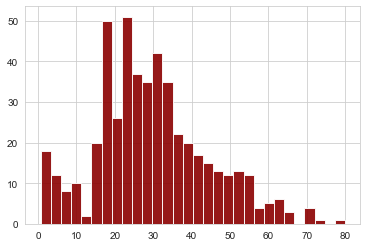

In [137]:
train['Age'].hist(bins=30,color='darkred',alpha=0.9)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

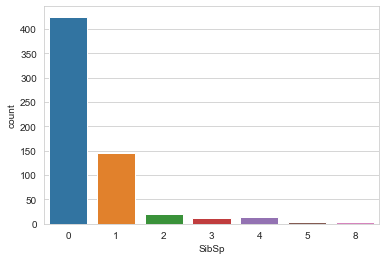

In [138]:
sns.countplot(x='SibSp',data=train)

## Cufflinks for plots

In [139]:
import cufflinks as cf
cf.go_offline()

In [140]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

___
## Data Cleaning
Filling in missing age data instead of just dropping the missing age data rows. 
Checking the average age by passenger class and using that to fill in missing ones.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

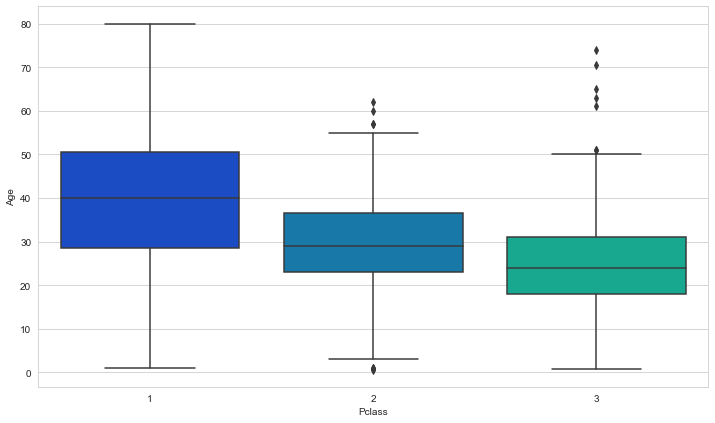

In [141]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. I'll use these average age values to impute based on Pclass for Age.

In [142]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [143]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

<AxesSubplot:>

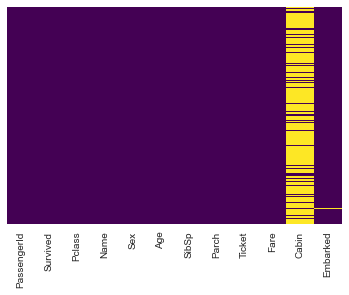

In [144]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Dropping Cabin column and the row in Embarked that is NaN.

In [145]:
train.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

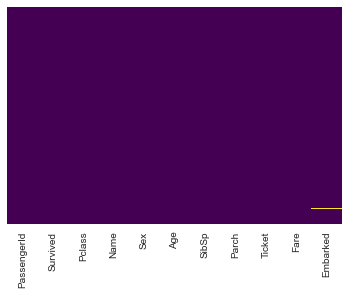

In [146]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [147]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
4,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [148]:
train.dropna(inplace=True)

<AxesSubplot:>

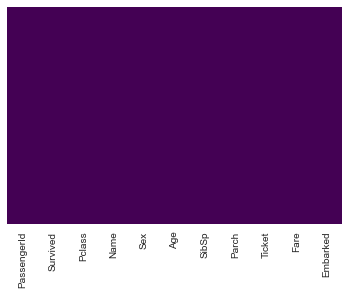

In [149]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables, otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [150]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 0 to 623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  623 non-null    int64  
 1   Survived     623 non-null    int64  
 2   Pclass       623 non-null    int64  
 3   Name         623 non-null    object 
 4   Sex          623 non-null    object 
 5   Age          623 non-null    float64
 6   SibSp        623 non-null    int64  
 7   Parch        623 non-null    int64  
 8   Ticket       623 non-null    object 
 9   Fare         623 non-null    float64
 10  Embarked     623 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 58.4+ KB


In [151]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [152]:
sex = pd.get_dummies(train['Sex'])
sex

,female,male
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
619,0,1
620,0,1
621,1,0
622,1,0


In [153]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [154]:
train = pd.concat([train,sex,embark],axis=1)

In [155]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,1
3,5,0,3,35.0,0,0,8.0500,0,1,0,1
4,10,1,2,14.0,1,0,30.0708,1,0,0,0


In [156]:
train.drop(['female'],axis=1,inplace=True)

In [157]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,5,0,3,35.0,0,0,8.0500,1,0,1
4,10,1,2,14.0,1,0,30.0708,0,0,0


## Clean test set

Cleaning test set similar to train set

In [158]:
test = pd.read_csv('DA_titanic_test.csv')

In [182]:
test.info

<bound method DataFrame.info of      PassengerId  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0              4       1  35.0      1      0  53.1000     0  0  1
1              6       3  24.0      0      0   8.4583     1  1  0
2              7       1  54.0      0      0  51.8625     1  0  1
3              8       3   2.0      3      1  21.0750     1  0  1
4              9       3  27.0      0      2  11.1333     0  0  1
..           ...     ...   ...    ...    ...      ...   ... .. ..
262          880       1  56.0      0      1  83.1583     0  0  0
263          882       3  33.0      0      0   7.8958     1  0  1
264          886       3  39.0      0      5  29.1250     0  1  0
265          887       2  27.0      0      0  13.0000     1  0  1
266          890       1  26.0      0      0  30.0000     1  0  0

[267 rows x 9 columns]>

In [159]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
1,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
2,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
4,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


<AxesSubplot:>

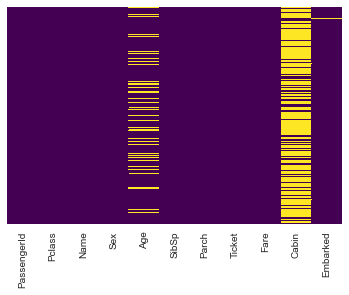

In [160]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [161]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

In [162]:
test.drop('Cabin',axis=1,inplace=True)

test.dropna(inplace=True)

## Converting categorical features 

In [164]:
sex = pd.get_dummies(test['Sex'],drop_first=True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)

In [165]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [166]:
test = pd.concat([test,sex,embark],axis=1)

In [167]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,4,1,35.0,1,0,53.1000,0,0,1
1,6,3,24.0,0,0,8.4583,1,1,0
2,7,1,54.0,0,0,51.8625,1,0,1
3,8,3,2.0,3,1,21.0750,1,0,1
4,9,3,27.0,0,2,11.1333,0,0,1


# Building a Logistic Regression model


## Train Test Split

In [168]:
X_train = train.drop('Survived',axis=1)

In [169]:
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,5,3,35.0,0,0,8.0500,1,0,1
4,10,2,14.0,1,0,30.0708,0,0,0


In [170]:
X_test = test

In [171]:
X_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,4,1,35.0,1,0,53.1000,0,0,1
1,6,3,24.0,0,0,8.4583,1,1,0
2,7,1,54.0,0,0,51.8625,1,0,1
3,8,3,2.0,3,1,21.0750,1,0,1
4,9,3,27.0,0,2,11.1333,0,0,1


In [172]:
y_train = train['Survived']

In [173]:
y_train.head()

0    0
1    1
2    1
3    0
4    1
Name: Survived, dtype: int64

## Training and Predicting

In [175]:
from sklearn.linear_model import LogisticRegression

In [176]:
LogisticRegression(max_iter=30000)

LogisticRegression(max_iter=30000)

In [177]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\zekes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [178]:
predictions = logmodel.predict(X_test)

In [181]:
predictions.size

267